In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [2]:
from pandas_datareader import data as web

In [3]:
tickers = ["GE", "T", "NVDA", "SNE"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2004-1-1")["Adj Close"]

In [4]:
data.head()

,GE,T,NVDA,SNE
Date,,,,
2004-01-02,17.370064,11.077169,7.080785,30.470947
2004-01-05,17.626814,11.462791,7.310880,31.220083
2004-01-06,17.509602,11.492455,7.608468,30.958763
2004-01-07,17.682623,11.617856,7.675963,31.272352
2004-01-08,18.000790,11.827921,7.703575,31.594652


### Calculate Normal Returns

In [5]:
for t in tickers:
    data[f"{t} norm returns"] = data[f"{t}"]/data[f"{t}"].iloc[0]

In [6]:
data.head()

,GE,T,NVDA,SNE,GE norm returns,T norm returns,NVDA norm returns,SNE norm returns
Date,,,,,,,,
2004-01-02,17.370064,11.077169,7.080785,30.470947,1.000000,1.000000,1.000000,1.000000
2004-01-05,17.626814,11.462791,7.310880,31.220083,1.014781,1.034812,1.032496,1.024585
2004-01-06,17.509602,11.492455,7.608468,30.958763,1.008033,1.037490,1.074523,1.016009
2004-01-07,17.682623,11.617856,7.675963,31.272352,1.017994,1.048811,1.084055,1.026301
2004-01-08,18.000790,11.827921,7.703575,31.594652,1.036311,1.067775,1.087955,1.036878


### Calculate the allocation for each stock with arbritrary weights

In [7]:
weights = [0.1,0.4,0.3,0.2]
for t, wei in zip(tickers,weights):
    data[f"{t} allocation"] = data[f"{t} norm returns"] * wei

In [8]:
data.head()

,GE,T,NVDA,SNE,GE norm returns,T norm returns,NVDA norm returns,SNE norm returns,GE allocation,T allocation,NVDA allocation,SNE allocation
Date,,,,,,,,,,,,
2004-01-02,17.370064,11.077169,7.080785,30.470947,1.000000,1.000000,1.000000,1.000000,0.100000,0.400000,0.300000,0.200000
2004-01-05,17.626814,11.462791,7.310880,31.220083,1.014781,1.034812,1.032496,1.024585,0.101478,0.413925,0.309749,0.204917
2004-01-06,17.509602,11.492455,7.608468,30.958763,1.008033,1.037490,1.074523,1.016009,0.100803,0.414996,0.322357,0.203202
2004-01-07,17.682623,11.617856,7.675963,31.272352,1.017994,1.048811,1.084055,1.026301,0.101799,0.419524,0.325217,0.205260
2004-01-08,18.000790,11.827921,7.703575,31.594652,1.036311,1.067775,1.087955,1.036878,0.103631,0.427110,0.326386,0.207376


### Poistion

In [9]:
for t in tickers:
    data[f"{t} Pos"] = data[f"{t} allocation"] * 100000

In [10]:
data.head()

,GE,T,NVDA,SNE,GE norm returns,T norm returns,NVDA norm returns,SNE norm returns,GE allocation,T allocation,NVDA allocation,SNE allocation,GE Pos,T Pos,NVDA Pos,SNE Pos
Date,,,,,,,,,,,,,,,,
2004-01-02,17.370064,11.077169,7.080785,30.470947,1.000000,1.000000,1.000000,1.000000,0.100000,0.400000,0.300000,0.200000,10000.000000,40000.000000,30000.000000,20000.000000
2004-01-05,17.626814,11.462791,7.310880,31.220083,1.014781,1.034812,1.032496,1.024585,0.101478,0.413925,0.309749,0.204917,10147.811839,41392.493010,30974.872389,20491.705075
2004-01-06,17.509602,11.492455,7.608468,30.958763,1.008033,1.037490,1.074523,1.016009,0.100803,0.414996,0.322357,0.203202,10080.332354,41499.610770,32235.696168,20320.184242
2004-01-07,17.682623,11.617856,7.675963,31.272352,1.017994,1.048811,1.084055,1.026301,0.101799,0.419524,0.325217,0.205260,10179.941267,41952.435995,32521.663719,20526.012497
2004-01-08,18.000790,11.827921,7.703575,31.594652,1.036311,1.067775,1.087955,1.036878,0.103631,0.427110,0.326386,0.207376,10363.110849,42710.986777,32638.647597,20737.558239


### Total Positons

In [11]:
data.columns

Index(['GE', 'T', 'NVDA', 'SNE', 'GE norm returns', 'T norm returns',
       'NVDA norm returns', 'SNE norm returns', 'GE allocation',
       'T allocation', 'NVDA allocation', 'SNE allocation', 'GE Pos', 'T Pos',
       'NVDA Pos', 'SNE Pos'],
      dtype='object')

In [12]:
data["Total Pos"] = data[['GE Pos', 'T Pos','NVDA Pos', 'SNE Pos']].sum(axis = 1)

In [13]:
data.head()

,GE,T,NVDA,SNE,GE norm returns,T norm returns,NVDA norm returns,SNE norm returns,GE allocation,T allocation,NVDA allocation,SNE allocation,GE Pos,T Pos,NVDA Pos,SNE Pos,Total Pos
Date,,,,,,,,,,,,,,,,,
2004-01-02,17.370064,11.077169,7.080785,30.470947,1.000000,1.000000,1.000000,1.000000,0.100000,0.400000,0.300000,0.200000,10000.000000,40000.000000,30000.000000,20000.000000,100000.000000
2004-01-05,17.626814,11.462791,7.310880,31.220083,1.014781,1.034812,1.032496,1.024585,0.101478,0.413925,0.309749,0.204917,10147.811839,41392.493010,30974.872389,20491.705075,103006.882313
2004-01-06,17.509602,11.492455,7.608468,30.958763,1.008033,1.037490,1.074523,1.016009,0.100803,0.414996,0.322357,0.203202,10080.332354,41499.610770,32235.696168,20320.184242,104135.823534
2004-01-07,17.682623,11.617856,7.675963,31.272352,1.017994,1.048811,1.084055,1.026301,0.101799,0.419524,0.325217,0.205260,10179.941267,41952.435995,32521.663719,20526.012497,105180.053477
2004-01-08,18.000790,11.827921,7.703575,31.594652,1.036311,1.067775,1.087955,1.036878,0.103631,0.427110,0.326386,0.207376,10363.110849,42710.986777,32638.647597,20737.558239,106450.303462


## Daily Returns 

In [14]:
data["Daily Returns"] = data["Total Pos"].pct_change()

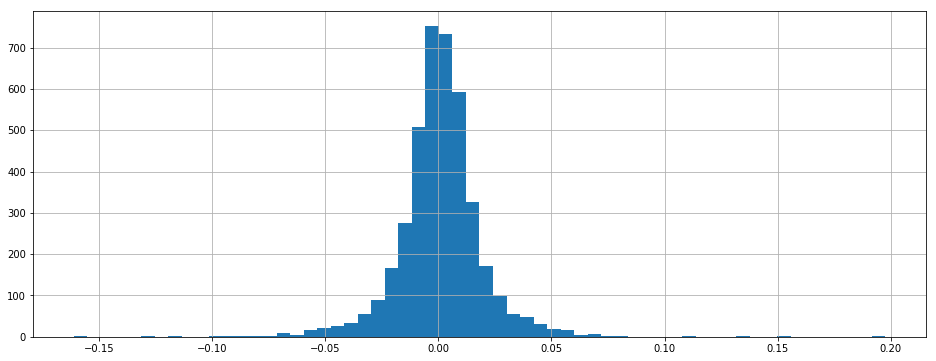

In [18]:
data["Daily Returns"].hist(figsize = (16,6), bins = 60)

### Volitility

In [19]:
port_mean_returns = data["Daily Returns"].mean()

In [20]:
port_Vol = data["Daily Returns"].std()

In [22]:
sharp = (port_mean_returns/port_Vol) * np.sqrt(252)

In [23]:
sharp

0.6626821138215747

### LEts optimize this portfolio using The efficient Frontier

In [25]:
port_Stocks = pd.DataFrame()
for t in tickers:
    port_Stocks[t] = web.DataReader(t, data_source="yahoo", start = "2004-1-1")["Adj Close"]

In [27]:
daily_returns = port_Stocks.pct_change()

In [29]:
daily_returns.corr()

,GE,T,NVDA,SNE
GE,1.000000,0.438799,0.363872,0.353533
T,0.438799,1.000000,0.347328,0.385854
NVDA,0.363872,0.347328,1.000000,0.348581
SNE,0.353533,0.385854,0.348581,1.000000


### we will create 2000 portfilios to st random allocations

In [32]:
number_of_port = 2000
all_weights = np.zeros((number_of_port, len(port_Stocks.columns)))
all_ret = np.zeros(number_of_port)
all_vol = np.zeros(number_of_port)
all_shp = np.zeros(number_of_port)

for ind in range(number_of_port):
    weights = np.array(np.random.random(4))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_ret[ind] = np.sum(daily_returns.mean() * weights) * 252
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    all_shp[ind] = all_ret[ind]/all_vol[ind]

## mAx sharp

In [38]:
max_sharp = all_shp.argmax()

## Low vol 

In [45]:
low_vol = all_vol.argmin()

## high return

In [46]:
high_ret = all_ret.argmax()

## plot of vol vs returns

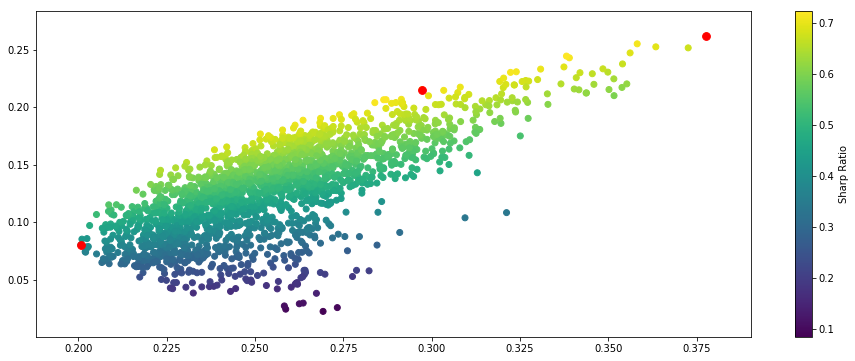

In [47]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_ret, cmap="viridis", c = all_shp)
plt.colorbar(label = "Sharp Ratio")
plt.scatter(all_vol[max_sharp], all_ret[max_sharp], c = "r", s = 60)
plt.scatter(all_vol[low_vol], all_ret[low_vol], c = "r", s = 60)
plt.scatter(all_vol[high_ret], all_ret[high_ret], c = "r", s = 60)

## There are 3 personalities. Looks like the max sharp is approximately .7. Lets use math to see if we ca nget a better value

In [49]:
def ret_vol_shp(weights):
    weights = np.array(weights)
    ret = np.sum(daily_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T , np.dot(daily_returns.cov() * 252, weights)))
    shp = ret/vol
    return np.array([ret, vol,shp])

In [50]:
def check_weights(weights):
    return np.sum(weights) - 1

In [51]:
def reduceSharp(weights):
    return ret_vol_shp(weights)[2] * -1

In [54]:
con = {"type":"eq", "fun":check_weights}

In [56]:
bounds = ((0,1),) * len(port_Stocks.columns)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [57]:
initial_guess = [0.25] * len(port_Stocks.columns)
initial_guess

[0.25, 0.25, 0.25, 0.25]

In [58]:
from scipy.optimize import minimize

In [59]:
bestCase = minimize(reduceSharp, initial_guess, method="SLSQP", bounds= bounds, constraints=con)

In [60]:
bestCase

     fun: -0.7282106472387616
     jac: array([ 3.25331926e-01, -1.07362866e-04,  8.61138105e-05,  2.29387954e-02])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.00000000e+00, 4.45099065e-01, 5.54900935e-01, 3.86068892e-18])

## this gives us a sharp of 0.72 a bit more than our random allocations. The Ret, Vol and sharp are below

In [61]:
ret_vol_shp(bestCase.x)

array([0.22653106, 0.31107903, 0.72821065])

## LEts plot the efficient Frontier on the plot above

In [62]:
frontier_y = np.linspace(0,0.3,100)

In [63]:
def minimize_vol(weights):
    return ret_vol_shp(weights)[1]

In [64]:
frontier_vol = []

In [66]:
for possible_ret in frontier_y:
    const = ({"type": 'eq', "fun":check_weights}, {"type":"eq","fun": lambda w: ret_vol_shp(w)[0] - possible_ret})
    result = minimize(minimize_vol, initial_guess, method="SLSQP", bounds=bounds, constraints=const)
    frontier_vol.append(result["fun"])

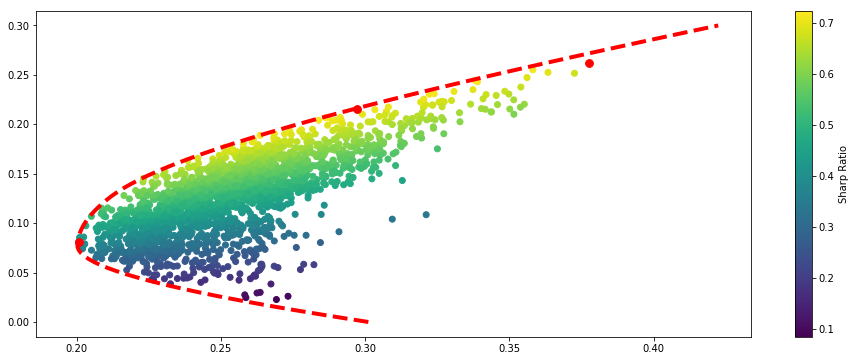

In [68]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_ret, cmap="viridis", c = all_shp)
plt.colorbar(label = "Sharp Ratio")
plt.scatter(all_vol[max_sharp], all_ret[max_sharp], c = "r", s = 60)
plt.scatter(all_vol[low_vol], all_ret[low_vol], c = "r", s = 60)
plt.scatter(all_vol[high_ret], all_ret[high_ret], c = "r", s = 60)
plt.plot(frontier_vol, frontier_y, ls = "--", c = "r", lw = 4)